<DIV ALIGN=CENTER>

# Introduction to Network Analysis: Graph Analysis
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

In this IPython Notebook, we build on 

-----



-----

### Student Activity

In the preceding cells, we introduced several basic graph concepts,
including XX YY ZZ. Now
that you have run the Notebook, go back and make the following changes
to see how the results change.

1. Change 
2. Replace 
3. Try using 

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import networkx as nx


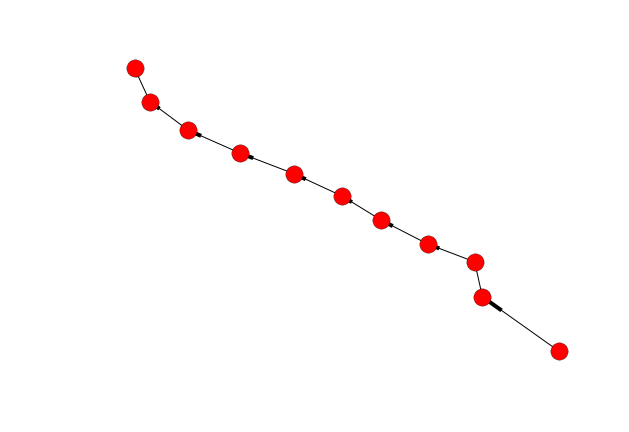

In [10]:
# make a directed graph to traverse

dg = nx.DiGraph()  
dg.add_nodes_from(range(10))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

nx.draw(dg)  
plt.show()

In [21]:
fmt_str = 'Node {0} has {1} edge(s)'

for node in dg.nodes():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has 1 edge(s)
Node 1 has 2 edge(s)
Node 2 has 2 edge(s)
Node 3 has 2 edge(s)
Node 4 has 2 edge(s)
Node 5 has 2 edge(s)
Node 6 has 2 edge(s)
Node 7 has 2 edge(s)
Node 8 has 2 edge(s)
Node 9 has 2 edge(s)
Node 10 has 1 edge(s)


In [22]:
fmt_str = 'Node {0} has degree {1}'

for node in dg.nodes_iter():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has degree 1
Node 1 has degree 2
Node 2 has degree 2
Node 3 has degree 2
Node 4 has degree 2
Node 5 has degree 2
Node 6 has degree 2
Node 7 has degree 2
Node 8 has degree 2
Node 9 has degree 2
Node 10 has degree 1


In [23]:
fmt_str = 'Node {0} connected to Node {1} with Weight {2}'
for n, m, attr in dg.edges(data=True):
    print(fmt_str.format(n, m, attr['weight']))

Node 0 connected to Node 1 with Weight 10
Node 1 connected to Node 2 with Weight 20
Node 2 connected to Node 3 with Weight 30
Node 3 connected to Node 4 with Weight 40
Node 4 connected to Node 5 with Weight 50
Node 5 connected to Node 6 with Weight 60
Node 6 connected to Node 7 with Weight 70
Node 7 connected to Node 8 with Weight 80
Node 8 connected to Node 9 with Weight 90
Node 9 connected to Node 10 with Weight 100


-----

## Graph Operations


-----

In [49]:
g1 = nx.Graph()
g1.add_nodes_from(range(6))

g2 = nx.Graph()
g2.add_nodes_from(range(6, 12))

g3 = nx.Graph()
g3.add_nodes_from(range(3, 11))

print('Nodes in Graph 1:', g1.nodes())
print('Nodes in Graph 2:', g2.nodes())
print('Nodes in Graph 3:', g3.nodes())

# Combine graphs with no overlaps
gu = nx.union(g1, g2)
print('\nNodes in Union of Graphs 1 and 2:', gu.nodes())

# Combine graphs with possible overlaps
gcm = nx.compose(g1, g3)
print('\nNodes in Composition of Graphs 1 and 3:', gcm.nodes())

# Make a subgraph, of specific nodes
gsg = nx.subgraph(gu, g3)
print('\nSubgraph (g3 nodes) from Union of Graphs 1 and 2:', gsg.nodes())

# Disjoint union treats each node as distinct.
gdu = nx.disjoint_union(g1, g3)
print('\nNodes in Disjoint Union of Graphs 1 and 3:', gdu.nodes())

print('\nCaretsian Product of Graphs 1 and 2')
gcp = nx.cartesian_product(g1, g2)

import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=54, compact=True)

pp.pprint(gcp.nodes())

Nodes in Graph 1: [0, 1, 2, 3, 4, 5]
Nodes in Graph 2: [6, 7, 8, 9, 10, 11]
Nodes in Graph 3: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Union of Graphs 1 and 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Nodes in Composition of Graphs 1 and 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Subgraph (g3 nodes) from Union of Graphs 1 and 2: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Disjoint Union of Graphs 1 and 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Caretsian Product of Graphs 1 and 2
[ (4, 10), (4, 7), (2, 6), (5, 10), (4, 8), (5, 6),
  (2, 8), (3, 11), (0, 7), (2, 10), (5, 9), (0, 9),
  (3, 9), (1, 6), (0, 10), (3, 7), (1, 11), (4, 11),
  (2, 7), (0, 8), (4, 9), (4, 6), (2, 9), (3, 10),
  (5, 7), (2, 11), (0, 11), (3, 8), (0, 6), (1, 8),
  (5, 8), (3, 6), (1, 7), (1, 10), (5, 11), (1, 9)]


Edges in Graph h: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


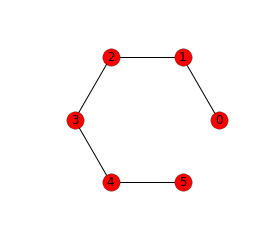

In [57]:
h = nx.path_graph(6)
print('Edges in Graph h:', h.edges())

plt.figure(figsize=(3, 3))
nx.draw_circular(h, with_labels=True)
plt.show()

Edges in Complement of Graph h: [(0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 4), (2, 5), (3, 5)]


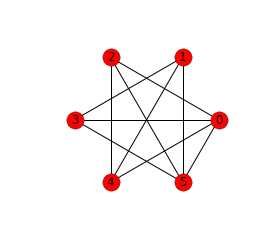

In [58]:
hc = nx.complement(h)
print('Edges in Complement of Graph h:', hc.edges())

plt.figure(figsize=(3, 3))
nx.draw_circular(hc, with_labels=True)
plt.show()

-----

## Graph Generators

Simple generators like petersen, tutte, sedgewick_maze, or tetrahedral.
Classic graph generators like complete, complete bipartite, barbell, and lollipop
Stochastic generators like erdos renyi, barabasi albert, watts strogatz, or random lobster

-----

Peterson Graph Edges:

[ (0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3),
  (2, 7), (3, 8), (3, 4), (4, 9), (5, 8), (5, 7),
  (6, 8), (6, 9), (7, 9)]


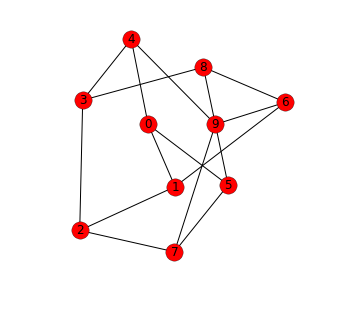

In [85]:
pg = nx.petersen_graph()
print('Peterson Graph Edges:\n')
pp.pprint(pg.edges())

plt.figure(figsize=(4, 4))
nx.draw(pg, with_labels=True)  
plt.show() 

CG Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


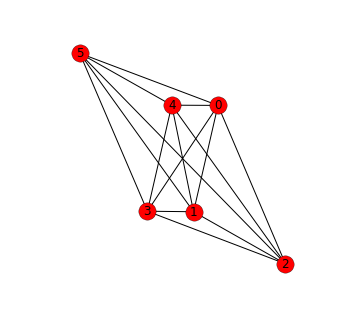

In [86]:
cg = nx.complete_graph(6)  
print('CG Edges:', cg.edges())

plt.figure(figsize=(4, 4))
nx.draw(cg, with_labels=True)  
plt.show() 

CBG Edges: [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]


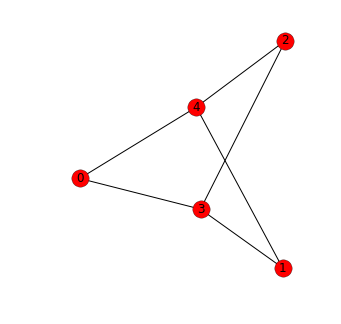

In [87]:
cbg = nx.complete_bipartite_graph(3, 2)
print('CBG Edges:', cbg.edges())

plt.figure(figsize=(4, 4))
nx.draw(cbg, with_labels=True)  
plt.show() 

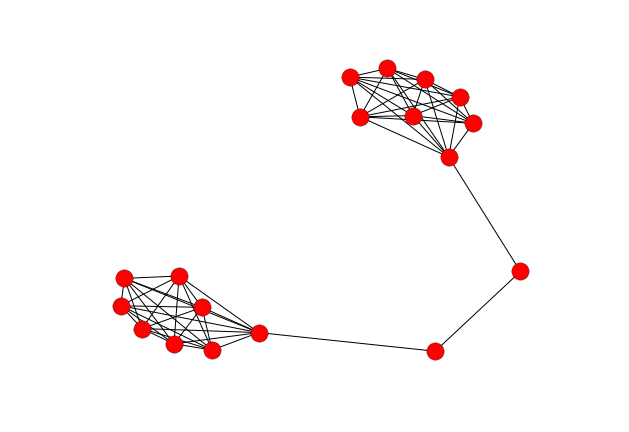

In [88]:
barbell = nx.barbell_graph(8, 2)  
nx.draw(barbell)  
plt.show()

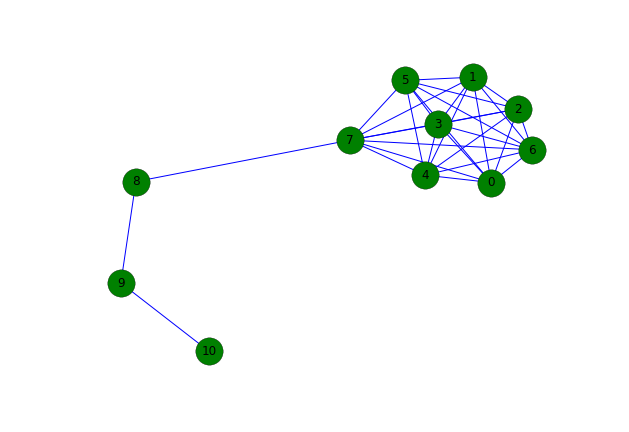

In [97]:
lg = nx.lollipop_graph(8, 3)

nx.draw(lg, with_labels=True, node_color='g', node_size=750, edge_color='b')
plt.show()

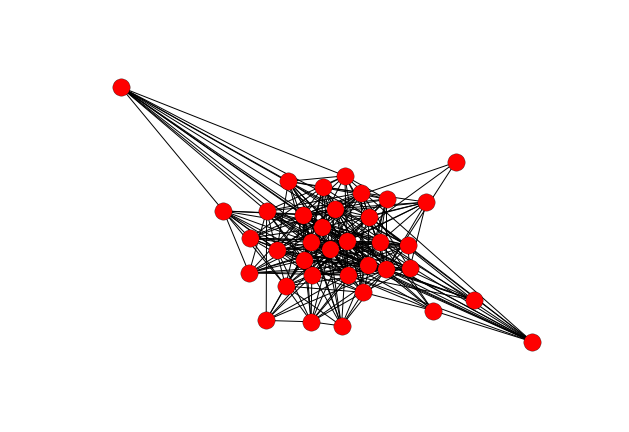

In [105]:
# The Barabási–Albert model is an algorithm for
# generating random scale-free networks

ba = nx.barabasi_albert_graph(36, 12)
nx.draw(ba)  
plt.show()

In [107]:
tcg = nx.complete_graph(12)
nx.write_gml(tcg, 'tmp-cg.dat')

In [108]:
!ls -la tmp-cg.dat

-rw-r--r-- 1 data_scientist staff 3046 Mar 23 21:36 tmp-cg.dat


CG Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (9, 10), (9, 11), (10, 11)]


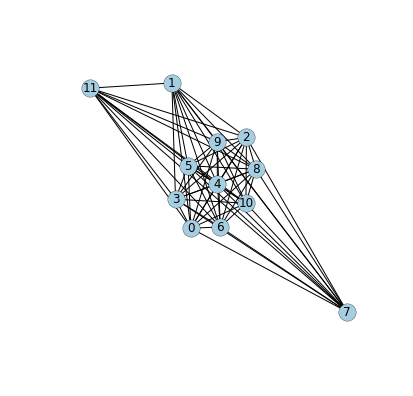

In [111]:
ncg = nx.read_gml('tmp-cg.dat')

print('CG Edges:', tcg.edges())

clrs = sns.color_palette("Paired")

plt.figure(figsize=(5, 5))
nx.draw(tcg, with_labels=True, node_color=clrs[0])
plt.show() 

-----

## Graph Analysis

-----

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.75, 8: 0.0, 9: 0.0, 10: 0.0}


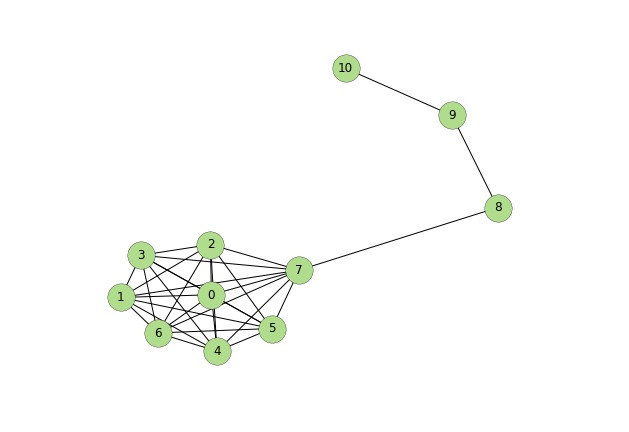

In [130]:
# Apply clustering to lollipop graph
print(nx.clustering(lg))

nx.draw(lg, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()


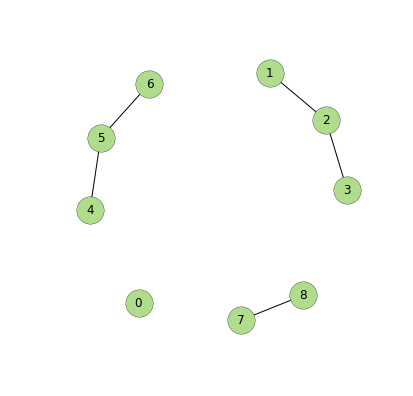

Connected Group 0 has 1 nodes: {0}
Connected Group 1 has 3 nodes: {1, 2, 3}
Connected Group 2 has 3 nodes: {4, 5, 6}
Connected Group 3 has 2 nodes: {8, 7}


In [150]:
g = nx.Graph()
g.add_nodes_from(range(8))
g.add_edges_from([(1, 2), (2, 3), (4, 5), (5, 6), (7, 8)])

plt.figure(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()

for idx, nds in enumerate(nx.connected_components(g)):
    print('Connected Group {0} has {1} nodes: {2}'.format(idx, len(nds), nds))


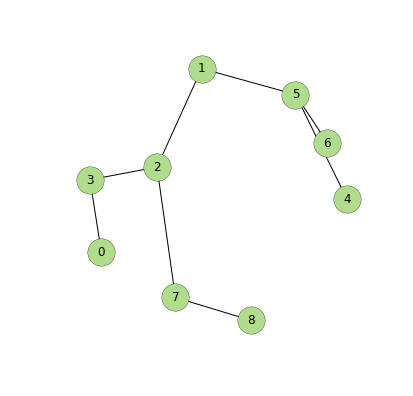

In [163]:
# Compute Shortest Paths

g.add_edges_from([(0, 3), (2, 7), (1, 5)])

plt.figure(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750)
plt.show()

In [164]:
print("Graph Radius: {0:3.1f}".format(nx.radius(g)))
print("Graph Diameter: {0:3.1f}".format(nx.diameter(g)))
print("Graph Eccentricity: {0}".format(nx.eccentricity(g)))
print("Graph Center: {0}".format(nx.center(g)))
print("Graph Periphery: {0}".format(nx.periphery(g)))
print("Graph Density: {0:4.3f}".format(nx.density(g)))

Graph Radius: 3.0
Graph Diameter: 5.0
Graph Eccentricity: {0: 5, 1: 3, 2: 3, 3: 4, 4: 5, 5: 4, 6: 5, 7: 4, 8: 5}
Graph Center: [1, 2]
Graph Periphery: [0, 4, 6, 8]
Graph Density: 0.222


In [165]:
path_lengths=[]

print("Starting Node {End Node : Length, ... }")
for node in g.nodes():
    spl= nx.single_source_shortest_path_length(g, node)
    print('{0} {1}'.format(node, spl))
    for path in spl.values():
        path_lengths.append(path)

print("\nAverage shortest Path Length = {0:4.3f}".format(sum(path_lengths)/len(path_lengths)))

Starting Node {End Node : Length, ... }
0 {0: 0, 1: 3, 2: 2, 3: 1, 4: 5, 5: 4, 6: 5, 7: 3, 8: 4}
1 {0: 3, 1: 0, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2, 8: 3}
2 {0: 2, 1: 1, 2: 0, 3: 1, 4: 3, 5: 2, 6: 3, 7: 1, 8: 2}
3 {0: 1, 1: 2, 2: 1, 3: 0, 4: 4, 5: 3, 6: 4, 7: 2, 8: 3}
4 {0: 5, 1: 2, 2: 3, 3: 4, 4: 0, 5: 1, 6: 2, 7: 4, 8: 5}
5 {0: 4, 1: 1, 2: 2, 3: 3, 4: 1, 5: 0, 6: 1, 7: 3, 8: 4}
6 {0: 5, 1: 2, 2: 3, 3: 4, 4: 2, 5: 1, 6: 0, 7: 4, 8: 5}
7 {0: 3, 1: 2, 2: 1, 3: 2, 4: 4, 5: 3, 6: 4, 7: 0, 8: 1}
8 {0: 4, 1: 3, 2: 2, 3: 3, 4: 5, 5: 4, 6: 5, 7: 1, 8: 0}

Average shortest Path Length = 2.420


In [171]:
# Accumulate number of paths in graph of given length

lengths = {}
for path in path_lengths:
    if path in lengths:
        lengths[path] += 1
    else:
        lengths[path] = 1

print("Length : Number of Paths")
for length in sorted(lengths.keys()):
    print('  {0}    :    {1:2d}'.format(length, lengths[length]))

Length : Number of Paths
  0    :     9
  1    :    16
  2    :    18
  3    :    16
  4    :    14
  5    :     8


In [183]:
print('Total number of maximal cliques = {0}'.format(nx.graph_number_of_cliques(g)))
print('Node {0} is in the most maximal cliques.\n'.format(nx.graph_clique_number(g)))

for clique in nx.find_cliques(g):
    print(clique)

Total number of maximal cliques = 8
Node 2 is in the most maximal cliques.

[0, 3]
[2, 1]
[2, 3]
[2, 7]
[4, 5]
[5, 1]
[5, 6]
[8, 7]


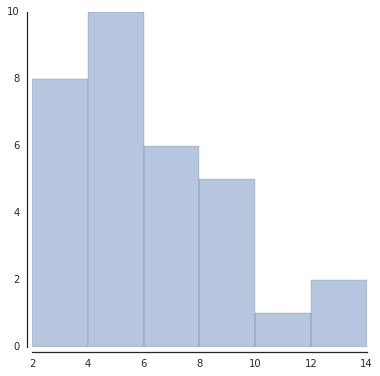

In [244]:
# Following NetworkX demo code
# http://networkx.readthedocs.org/en/networkx-1.11/examples/algorithms/davis_club.html

sample_graph = nx.davis_southern_women_graph()

edges = list(nx.degree(sample_graph).values())

plt.figure(figsize=(6, 6))
sns.set(style='white')
sns.distplot(edges, kde=False)
sns.despine(offset=5)

In [225]:
import networkx.algorithms.bipartite as bipartite

women = sample_graph.graph['top']

# We make a bipartite graph linking each individual woman to the other women
bpg = bipartite.projected_graph(sample_graph, women)
print('{0:25s} : # Friends'.format('Member'))
print(40*'-')

for woman in women:
    print('{0:25s} : {1:2d}'.format(woman, bpg.degree(woman)))

Member                    : # Friends
----------------------------------------
Evelyn Jefferson          : 17
Laura Mandeville          : 15
Theresa Anderson          : 17
Brenda Rogers             : 15
Charlotte McDowd          : 11
Frances Anderson          : 15
Eleanor Nye               : 15
Pearl Oglethorpe          : 16
Ruth DeSand               : 17
Verne Sanderson           : 17
Myra Liddel               : 16
Katherina Rogers          : 16
Sylvia Avondale           : 17
Nora Fayette              : 17
Helen Lloyd               : 17
Dorothy Murchison         : 16
Olivia Carleton           : 12
Flora Price               : 12


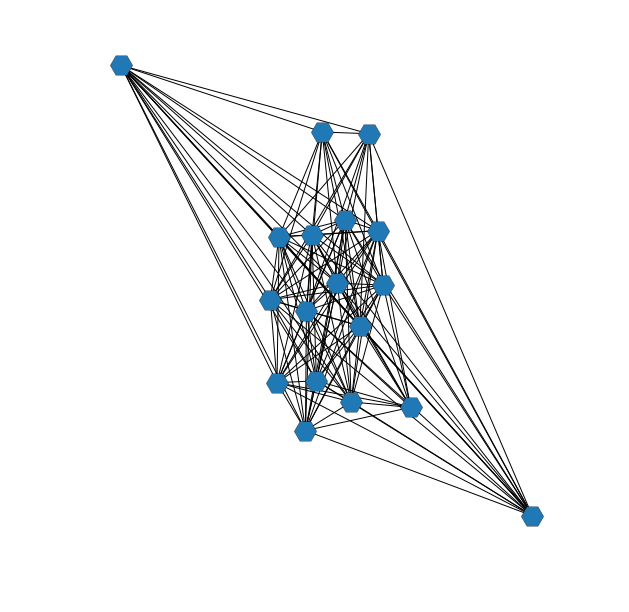

In [243]:
# Plot the connections between the women.
# Use different plot markers http://matplotlib.org/api/markers_api.html

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(bpg)
nx.draw(bpg, node_size=500, node_color=clrs[1], node_shape='H')
plt.show()

In [228]:
# Make bipartite graph that weights connections between an individual
# woman and the other women by the number of shared contacts

bpwg = bipartite.weighted_projected_graph(sample_graph, women)

print('{0:25s} : # Friend Meetings'.format('Member'))
print(40*'-')

for woman in women:
    print('{0:25s} : {1:2d}'.format(woman, bpwg.degree(woman, weight='weight')))

Member                    : # Friend Meetings
----------------------------------------
Evelyn Jefferson          : 50
Laura Mandeville          : 45
Theresa Anderson          : 57
Brenda Rogers             : 46
Charlotte McDowd          : 24
Frances Anderson          : 32
Eleanor Nye               : 36
Pearl Oglethorpe          : 31
Ruth DeSand               : 40
Verne Sanderson           : 38
Myra Liddel               : 33
Katherina Rogers          : 37
Sylvia Avondale           : 46
Nora Fayette              : 43
Helen Lloyd               : 34
Dorothy Murchison         : 24
Olivia Carleton           : 14
Flora Price               : 14
